In [0]:
!pip3 install torch

In [0]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn


In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.tensor(X, dtype=torch.float)
y_data = torch.tensor(y, dtype=torch.float)


In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1], c='g')
  plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
  plt.plot()

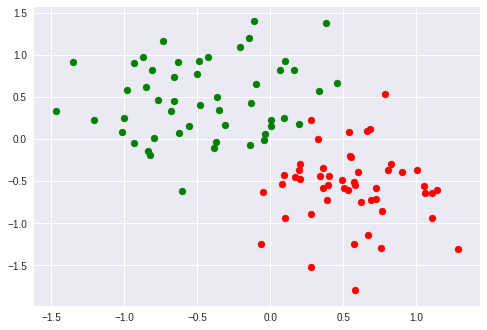

In [0]:
scatter_plot()
torch.dtype?

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [0]:
torch.manual_seed(2)
model = Model(2, 1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  #0 = w1x1 + w2x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()
  

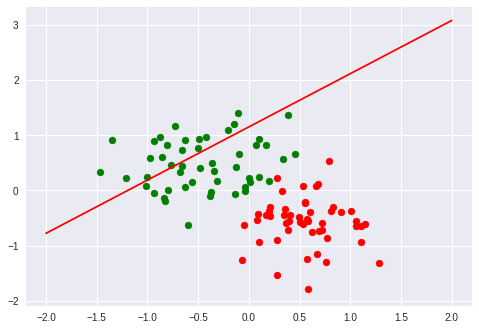

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [0]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch", i, "loss", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


epoch 0 loss 0.6185115575790405
epoch 1 loss 0.6081148386001587
epoch 2 loss 0.5980584621429443
epoch 3 loss 0.5883299708366394
epoch 4 loss 0.5789172649383545
epoch 5 loss 0.5698079466819763
epoch 6 loss 0.5609909892082214
epoch 7 loss 0.5524548888206482
epoch 8 loss 0.5441888570785522
epoch 9 loss 0.5361825823783875
epoch 10 loss 0.5284257531166077
epoch 11 loss 0.5209088325500488
epoch 12 loss 0.513622522354126
epoch 13 loss 0.5065579414367676
epoch 14 loss 0.49970608949661255
epoch 15 loss 0.4930593967437744
epoch 16 loss 0.48660901188850403
epoch 17 loss 0.48034802079200745
epoch 18 loss 0.47426894307136536
epoch 19 loss 0.4683645963668823
epoch 20 loss 0.4626285135746002
epoch 21 loss 0.4570543169975281
epoch 22 loss 0.451635479927063
epoch 23 loss 0.44636669754981995
epoch 24 loss 0.4412417709827423
epoch 25 loss 0.43625572323799133
epoch 26 loss 0.431403249502182
epoch 27 loss 0.4266791045665741
epoch 28 loss 0.42207926511764526
epoch 29 loss 0.4175984561443329
epoch 30 loss 0.

Text(0.5, 0, 'Epoch')

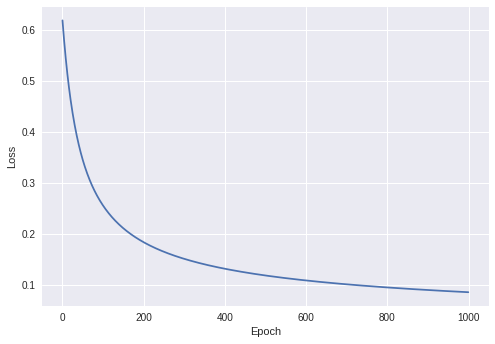

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

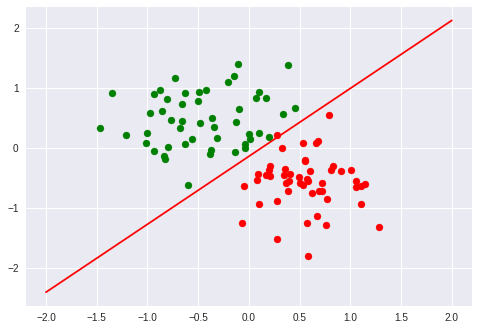

In [0]:
plot_fit('Trained Model')

yellow point positive probability = 0.999265730381012
Black point positive probability = 0.0002657687000464648
yellow point in class 1
black point in class 0


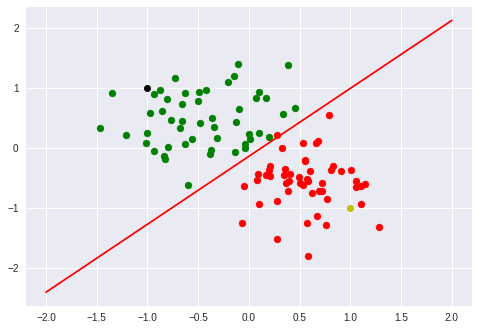

In [0]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'yo')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("yellow point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("yellow point in class {}".format(model.predict(point1)))
print("black point in class {}".format(model.predict(point2)))
plot_fit('Trained Model')
